# COVID-19 test recongition

## Problem
The problem is that with the coronavirus, people often use antibody tests. 

<img align="right" src="1.jpg" style="width: 200px;"/>
    They get results - stripes on the test. 
    People want to make sure that they understand correctly and send photos to doctors. 
    Thus, there is a need for an algorithm that would allow to give the result of the coronavirus test based on photo.

# Importance and dataset

This problem is new and is relevant to many people. Dataset was provided by Dr. Fomin's clinic: 2 types of tests of 10 and 30 photos, respectively.

Type 1 example:  <img align="centred" src="3.jpg" style="width: 100px;"/> 









Type 2 example: <img align="centred" src="15.jpg" style="width: 100px;"/> 


# Pipeline

1. Finding countrours and appoximation as rectangle

2. Prospective transformation

3. Finding lines and getting result

4. Solition in real time

# Finding countrours and appoximation as rectangle

We use

1) Thresholding (fixed and adaptive)

2) Morphology, erode

3) FindContours

4) convexHull

5) Appoximation as rectangle

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import numpy as np

In [6]:
def largest_contour(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
    _, bin_img = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY)
    
    bin_img = 255 - bin_img
    kernel = np.ones((5,5))
    bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel)
    kernel = np.ones((11,11))
    bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, kernel)
    
    bin_img = 255 - bin_img
        
    contours, _ = cv2.findContours(np.uint8(bin_img), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    c = max(contours, key = cv2.contourArea)
    
    hull = cv2.convexHull(c)
    
    return hull

In [43]:
def next_(img_name, flag=True, flag_2=False):
    img = cv2.imread(img_name)
    img = img[:, :, ::-1]
    contour = largest_contour(img)
    img_cnt = img.copy()
    img_cnt = cv2.drawContours(img_cnt, [contour], -1, (255, 0, 0), 10)
    if flag:
        return img_cnt
    else:
        cnt = contour
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        img_cnt = img.copy()
        cv2.drawContours(img_cnt,[box],0,(0,0,255), 10)
        if flag_2:
            warped = four_point_transform(img, box)
            return warped
        else:
            return img_cnt

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2
import skimage.io as io

from scipy.ndimage import gaussian_filter1d

def largest_contour(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
    _, bin_img = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY)
    
    bin_img = 255 - bin_img
    kernel = np.ones((5,5))
    bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel)
    kernel = np.ones((11,11))
    bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, kernel)
    
    bin_img = 255 - bin_img
        
    contours, _ = cv2.findContours(np.uint8(bin_img), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    c = max(contours, key = cv2.contourArea)
    
    hull = cv2.convexHull(c)
    
    return hull

def get_shpae(approx):
    if len(approx) == 3:
        shape = "triangle"
    elif len(approx) == 4:
        area = cv2.contourArea(approx)
        perimeter = cv2.arcLength(approx, True) 
        ar = area * 16 / perimeter**2
        shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
    else:
        shape = "circle"
    return shape

def order_points(pts):
    rect = np.zeros((4, 2), dtype = "float32")
    s = pts.reshape(4, 2).sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts.reshape(4, 2), axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect


def four_point_transform(image, pts):
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    return warped

# 1.1-1.4 Finding countrours using Thresholding, Morphology, FindContours, convexHull
Examples:


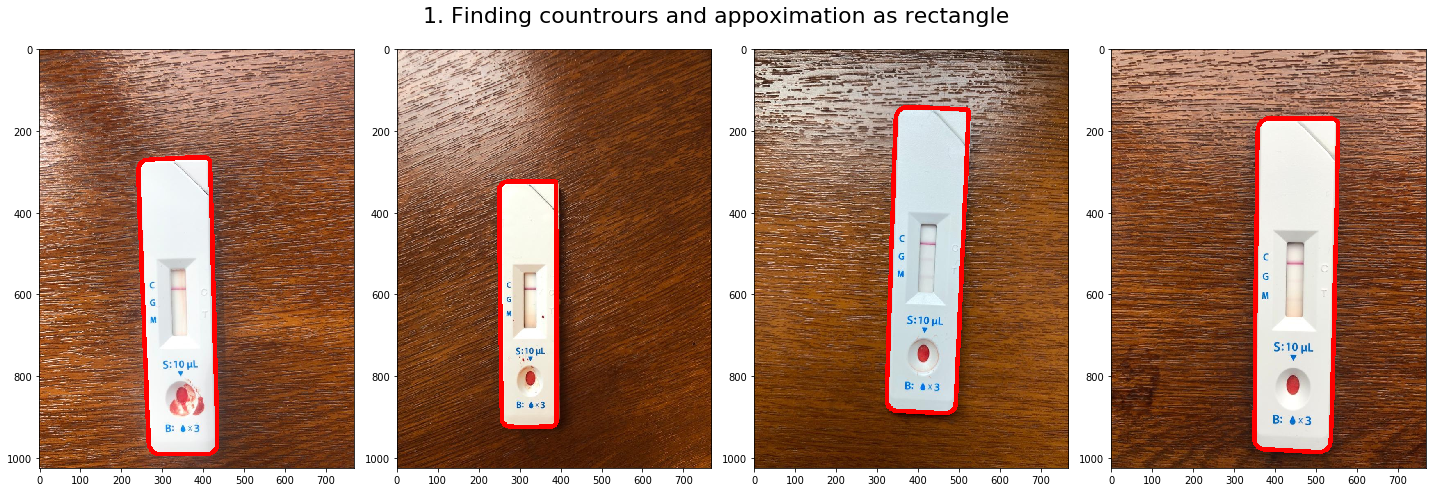

In [40]:
fig, ax = plt.subplots(1, 4, figsize=(20, 10), tight_layout=True)
fig.suptitle('1. Finding countrours and appoximation as rectangle', fontsize=22, y=0.85)
for i, img_name in enumerate(['1.jpg', '3.jpg', '9.jpg', '10.jpg']):
    img_cnt = next_(img_name)
    ax[i].imshow(img_cnt)

# 1.5 Appoximation as rectangle

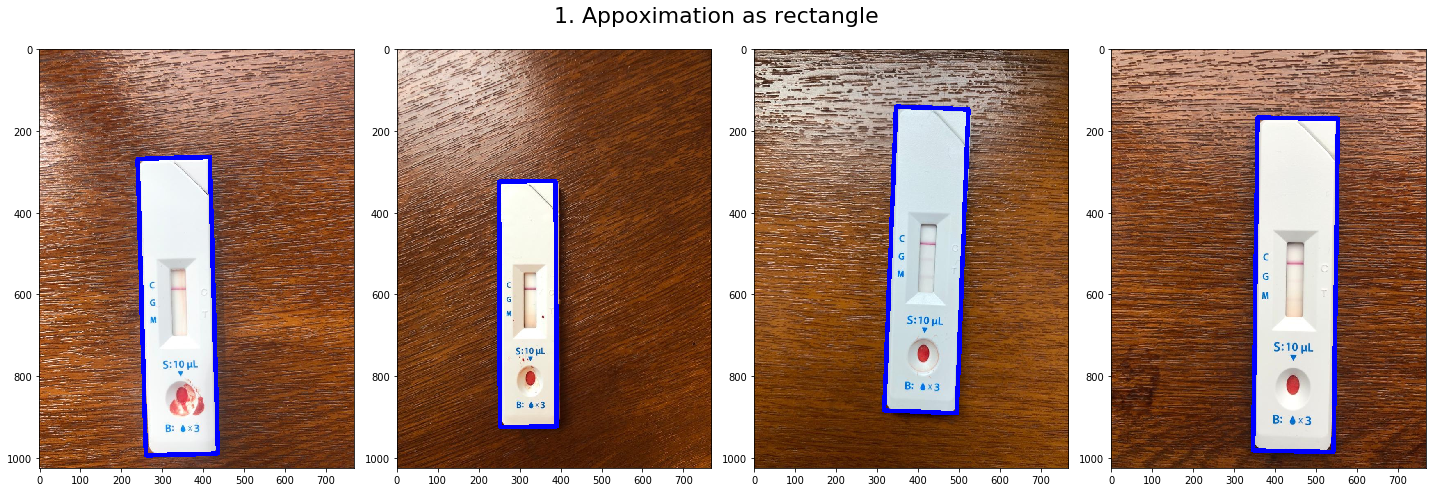

In [55]:
fig, ax = plt.subplots(1, 4, figsize=(20, 10), tight_layout=True)
fig.suptitle('1. Appoximation as rectangle', fontsize=22, y=0.85)
for i, img_name in enumerate(['1.jpg', '3.jpg', '9.jpg', '10.jpg']):
    img_cnt = next_(img_name, flag=False)
    ax[i].imshow(img_cnt)

# 2. Prospective transformation

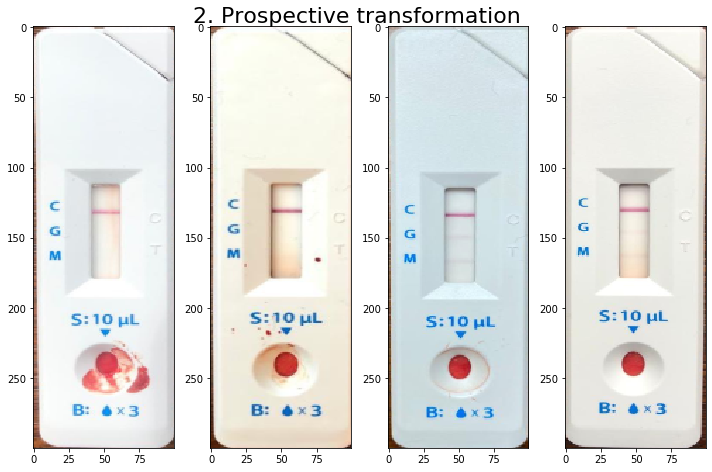

In [62]:
fig, ax = plt.subplots(1, 4, figsize=(10, 8), tight_layout=True)
fig.suptitle('2. Prospective transformation', fontsize=22, y=0.9)
for i, img_name in enumerate(['1.jpg', '3.jpg', '9.jpg', '10.jpg']):
    warped = next_(img_name, flag=False, flag_2=True)
    ax[i].imshow(cv2.resize(warped, (100, 300)))

# 3. Finding lines and getting result

In [83]:
def KK(im_n, flag=False):
    img = cv2.imread(im_n)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_smooth = cv2.bilateralFilter(img, 20, 100, 200)

    contour = largest_contour(img_smooth)

    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    cropped = four_point_transform(img, box).astype(np.float32)
    #l = four_point_transform(img, box)
    #plt.imshow(l)
    #plt.show()
    cropped = cropped / [cropped[:, :, 0].mean(), cropped[:, :, 1].mean(), cropped[:, :, 2].mean()] * [127, 127, 127]
    cropped = np.uint8(cropped)

    window = cropped[int(cropped.shape[0] * 0.4) : int(cropped.shape[0] * 0.6), int(cropped.shape[1] * 0.4) : int(cropped.shape[1] * 0.6), 0]
    window = 255 - window

    #plt.imshow(window, cmap='gray')
    #plt.show()

    sums = []
    for i in range(window.shape[0]):
        sums.append(sum(window[i]))

    sums /= np.sum(sums)


    l = sums.shape[0]
    m = sums.mean()

    if flag:
        res_ = ['RESULT IS :']
        #print(im_n, ": ", end='')

        if max(sums[int(l / 8):int(3 * l / 8)] - m) > 0.0001:
            #print("C ", end='')
            res_.append('C')
        if max(sums[int(3 * l / 8):int(5 * l / 8)] - m) >= 0.0000:
            #print("G ", end='')
            res_.append('G')
        if max(sums[int(5 * l / 8):int(7 * l / 8)] - m) >= 0.00005:
            #print("M ", end='')
            res_.append('M')

        #print("")
        return sums,res_
    return sums
    plt.plot(sums, label=im_n)
    plt.hlines(sums.mean(), 0, sums.shape[0])

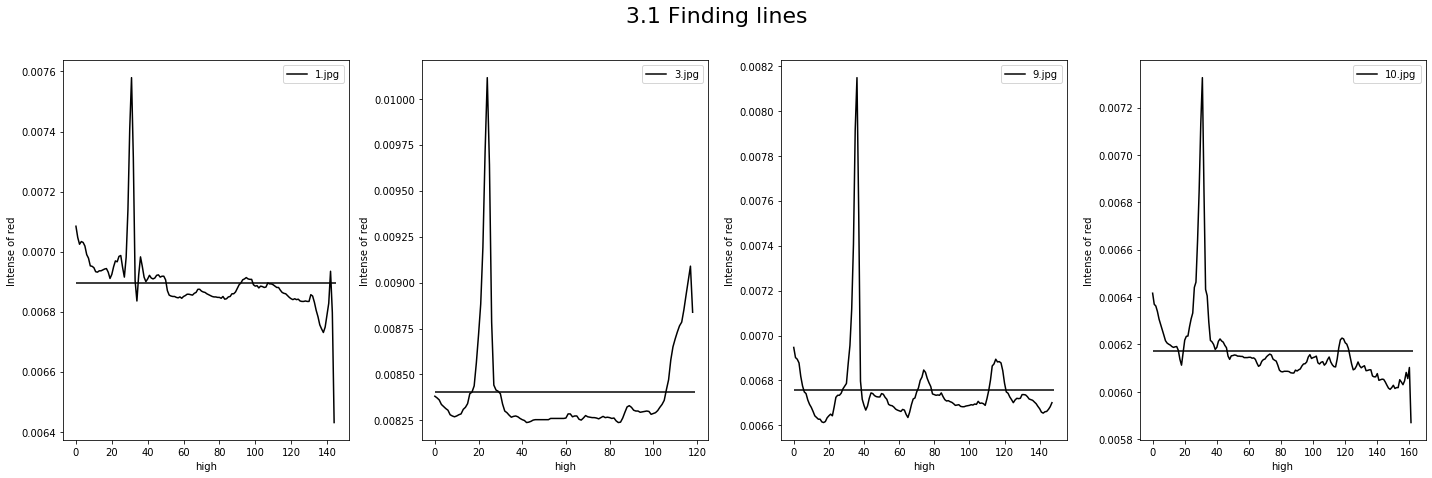

In [85]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6), tight_layout=True)
fig.suptitle('3.1 Finding lines', fontsize=22, y=1.1)
for i, img_name in enumerate(['1.jpg', '3.jpg', '9.jpg', '10.jpg']):
    sums = KK(img_name, flag=False)
    ax[i].set_xlabel('high')
    ax[i].set_ylabel('Intense of red')
    ax[i].plot(sums, label=img_name, color='k')
    ax[i].hlines(sums.mean(), 0, sums.shape[0])
    ax[i].legend()

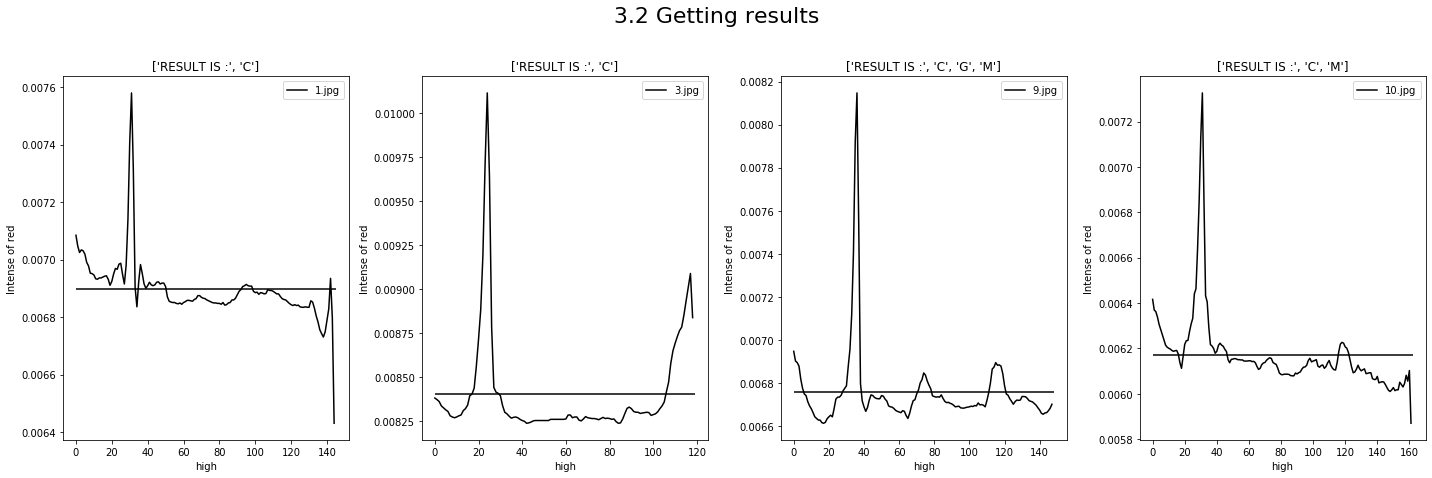

In [86]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6), tight_layout=True)
fig.suptitle('3.2 Getting results', fontsize=22, y=1.1)
for i, img_name in enumerate(['1.jpg', '3.jpg', '9.jpg', '10.jpg']):
    sums, res_ = KK(img_name, flag=True)
    ax[i].set_xlabel('high')
    ax[i].set_ylabel('Intense of red')
    ax[i].plot(sums, label=img_name, color='k')
    ax[i].hlines(sums.mean(), 0, sums.shape[0])
    ax[i].set_title(res_)
    ax[i].legend()

# 4. Solition in real time


<video style="width:70%" controls src="Saving.mov"></video>